## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [16]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [17]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). Code the helper function 'show_data()' that visualizes each given observation. HINT: use matplotlib.pyplot.imshow() and scipy.ndimage.interpolation().

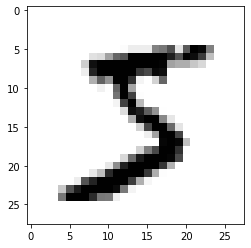

In [18]:
def show_data(X, Y, n, angle=0):
    Y = X[n].reshape(28,28)
    plt.imshow(Y, cmap='binary')
show_data(X_train, Y_train, 0, +10)

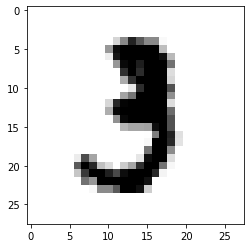

In [19]:
# Example 1.
show_data(X_train, Y_train,10,+10)

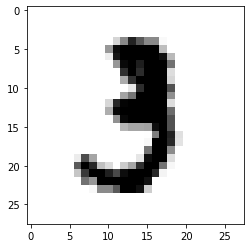

In [20]:
# Example 1.
show_data(X_train, Y_train,10,+10)

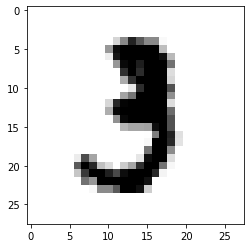

In [21]:
# Example 2.
show_data(X_train, Y_train,10,-30)

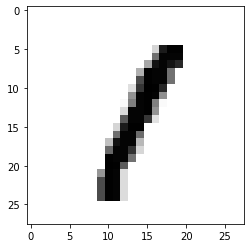

In [22]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

Accuracy: 0.68


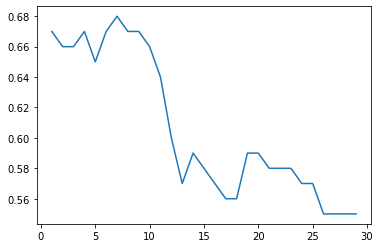

In [23]:
score = []
for i in range(1,30):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, Y_train)
    y_pred = kNN.predict(X_test)
    score.append(metrics.accuracy_score(Y_test, y_pred))
plt.plot([i for i in range(1,30)], score)

kNN = KNeighborsClassifier(n_neighbors=7) #k= 7 the best one
kNN.fit(X_train, Y_train)
y_pred = kNN.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [28]:
import random
def rotate_data(X):
    rotated_data=[]
    for image in X:
        reshaped= image.reshape(28,28)
        random.seed(14)
        rotated = rotate(reshaped, random.randrange(-180, 180), reshape=False)
        rotated_data.append(rotated.reshape(-1,))
    return np.array(rotated_data)

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [29]:
X_aug = np.vstack((X_train,rotate_data(X_train)))
Y_aug = np.hstack((Y_train,Y_train))
print(X_aug.shape)
print(Y_aug.shape)

(200, 784)
(200,)


5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

Accuracy: 0.68


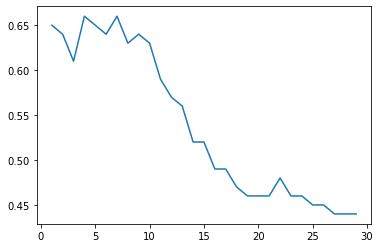

In [33]:
score = []
for i in range(1,30):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_aug, Y_aug)
    y_pred = kNN.predict(X_test)
    score.append(metrics.accuracy_score(Y_test, y_pred))
plt.plot([i for i in range(1,30)], score)

kNN = KNeighborsClassifier(n_neighbors=7)
kNN.fit(X_train, Y_train)
y_pred = kNN.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

The accuracy didnt go up, because knn depends on the distance which in our case is the same after the rotation